<a href="https://colab.research.google.com/github/ThomasNgVn/Risk_Score_Model_for_Diabetes_Patients/blob/main/Risk_score_model_for_retinopathy_in_diabetes_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>RISK SCORE MODEL FOR RETINOPATHY IN DIABETES PATIENTS</center>**

##**Overview of the Project**

In this project, I will buid a risk score model for retinopathy in diabetes patients using Logistic Regression.

Dataset is get from Coursera (AI for Medicine)

###**Retinopathy**
Retinopathy is an eye condition that causes changes to the blood vessels in the part of the eye called the retina. This often leads to vision changes or blindness. Diabetic patients are known to be at high risk for retinopathy.



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns

##Load Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
X_df = pd.read_csv('/content/drive/My Drive/Dataset/X_data.csv', index_col=0)
y_df = pd.read_csv('/content/drive/My Drive/Dataset/y_data.csv',index_col=0)


##Explore the Dataset

The features (`X`) include the following fields:
* Age: (years)
* Systolic_BP: Systolic blood pressure (mmHg)
* Diastolic_BP: Diastolic blood pressure (mmHg)
* Cholesterol: (mg/DL)

In [33]:
X_df.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [34]:
y_df.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [35]:
y = y_df['y']

Plot the histograms of each column of `X_df` below: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151bf2be90>,
      dtype=object)

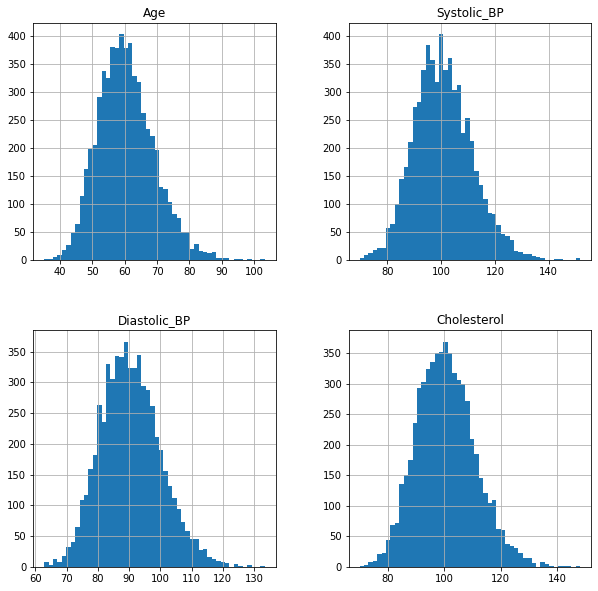

In [36]:
X_df.hist(bins = 50, figsize=(10,10))

In [37]:
#Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=68)

##Build Model

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Evaluate the Model Using the C-index

I will use the c-index to evaluate the model
* The c-index measures the discriminatory power of a risk score. 
* Intuitively, a higher c-index indicates that the model's prediction is in agreement with the actual outcomes of a pair of patients.
* The formula for the c-index is

$$ \mbox{cindex} = \frac{\mbox{concordant} + 0.5 \times \mbox{ties}}{\mbox{permissible}} $$

* A permissible pair is a pair of patients who have different outcomes.
* A concordant pair is a permissible pair in which the patient with the higher risk score also has the worse outcome.
* A tie is a permissible pair where the patients have the same risk score.


In [42]:
def cindex(y_true, scores):
    n = len(y_true)
    assert len(scores) == n
    concordant = 0
    permissible = 0
    ties = 0
    for i in range(n):
        for j in range(i+1, n): 
            if y_true[i] != y_true[j]:
                permissible = permissible +1
                if scores[i]==scores[j]:
                    ties=ties+1
                    continue
                if y_true[i] == 0 and y_true[j] == 1:
                    if scores[i] < scores[j]:
                        concordant = concordant + 1
                if y_true[i] == 1 and y_true[j] == 0:
                    if scores[i] > scores[j]:
                        concordant = concordant + 1
    c_index = (concordant + 0.5*ties)/permissible   
    return c_index

##Evaluate the Model on the Test Set

In [45]:
scores = lr.predict_proba(X_test)[:,1]
c_index = cindex(y_test.values,scores)
print(f'C-index on test set is {c_index:.4f}')

C-index on test set is 0.8376


In [51]:
coeffs = pd.DataFrame(data=lr.coef_, columns = X_df.columns)
coeffs.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,1.092647,0.702339,0.007185,0.617359


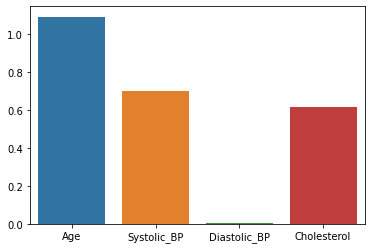

In [52]:
sns.barplot(data=coeffs)

Three variables have the largest impact on the model are Age, Syctolic_BP and Cholesterol

We need more data on different relevant features to improve the model.

This model will help doctor have a better retinopathy pronosis in diabetes patients.